In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Import the data
### See http://pbpython.com/web-scraping-mn-budget.html

In [2]:
df = pd.read_csv("mn-budget-detail-2014.csv")
df = df.sort_values('amount', ascending=False)
df.head()

,category,detail,amount
46,ADMINISTRATION,Capitol Renovation and Restoration Continued,126300000
1,UNIVERSITY OF MINNESOTA,Minneapolis; Tate Laboratory Renovation,56700000
78,HUMAN SERVICES,Minnesota Security Hospital - St. Peter,56317000
0,UNIVERSITY OF MINNESOTA,Higher Education Asset Preservation (HEAPR) 1,42500000
5,MINNESOTA STATE COLLEGES AND UNIVERSITIES,Higher Education Asset Preservation (HEAPR) 2,42500000


## Basic plotting with pandas/matplotlib

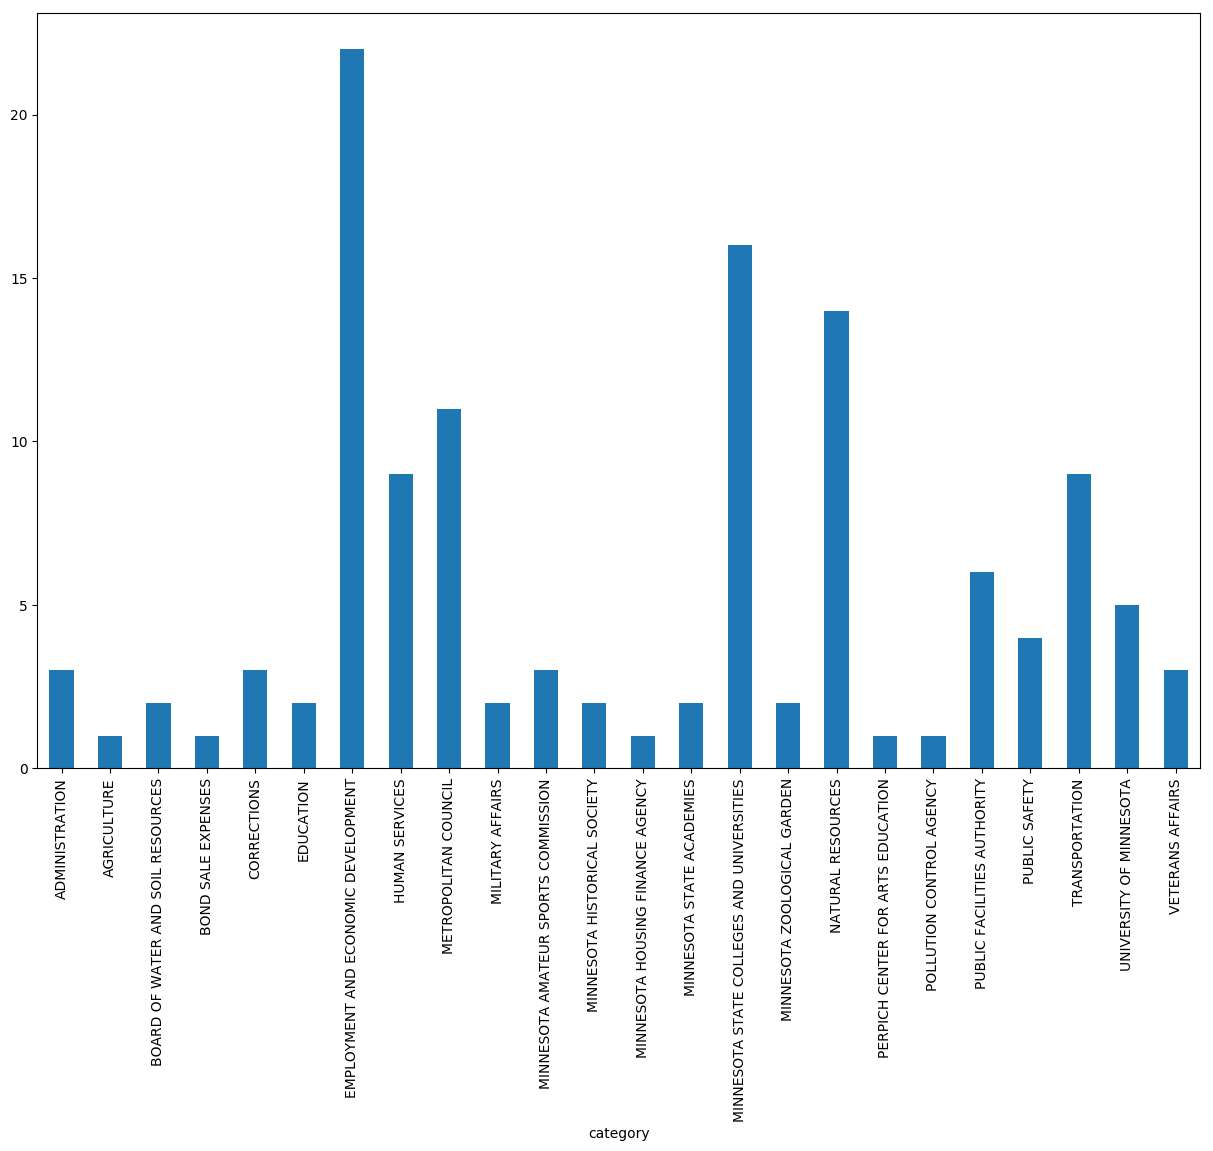

In [3]:
sizes = df.groupby('category').size()
sizes.plot(kind='bar', figsize=(15,10))

## Nicer styling with seaborn

In [4]:
import seaborn as sns
sns.set_style('white')

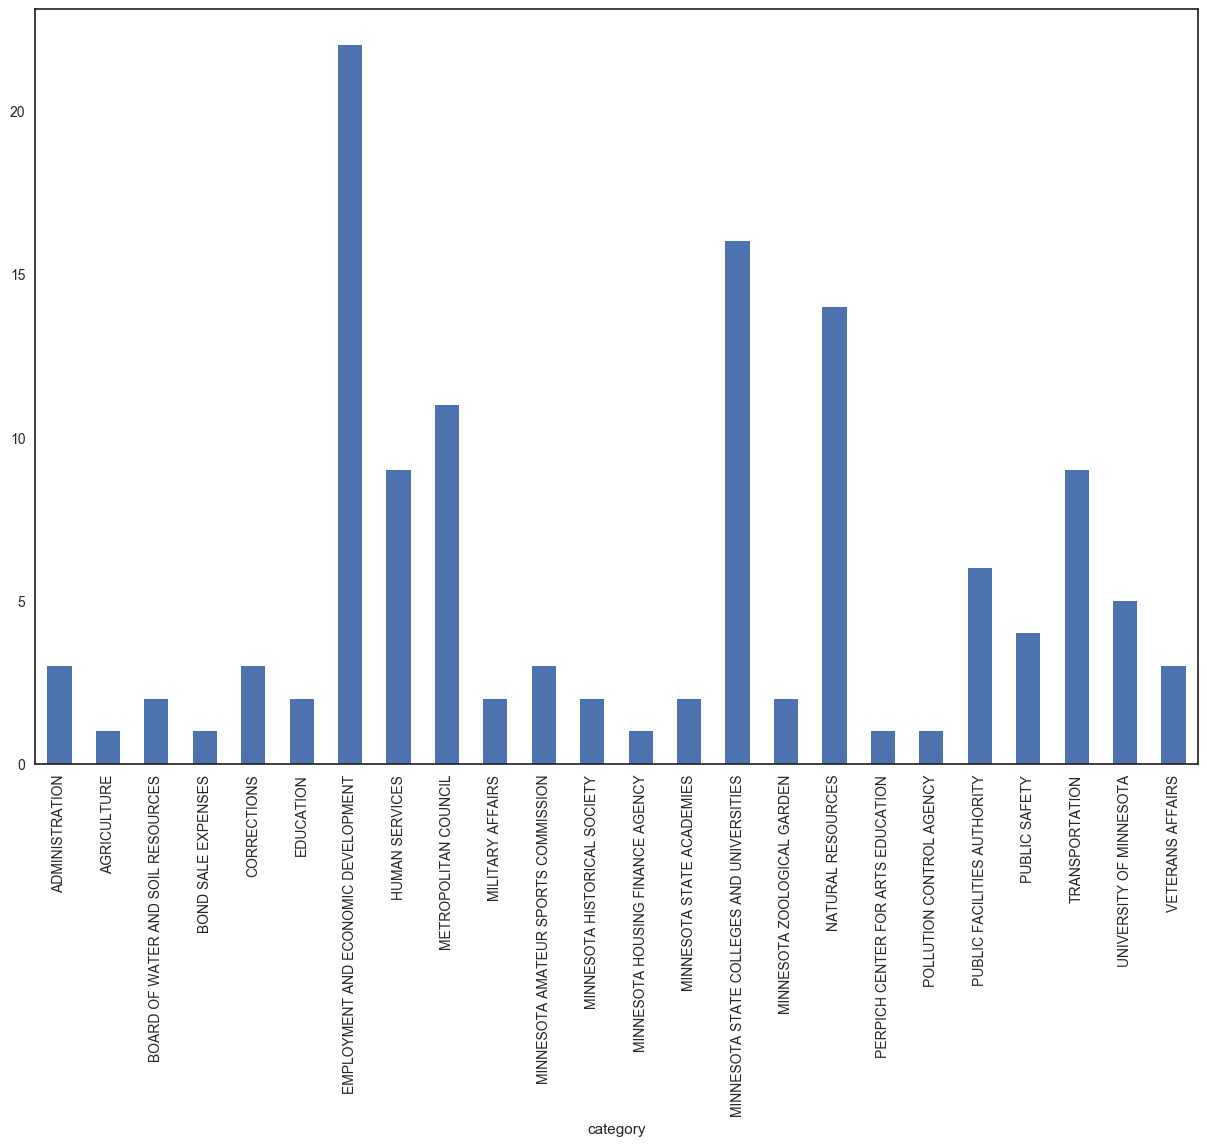

In [5]:
sizes.plot(kind='bar', figsize=(15,10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

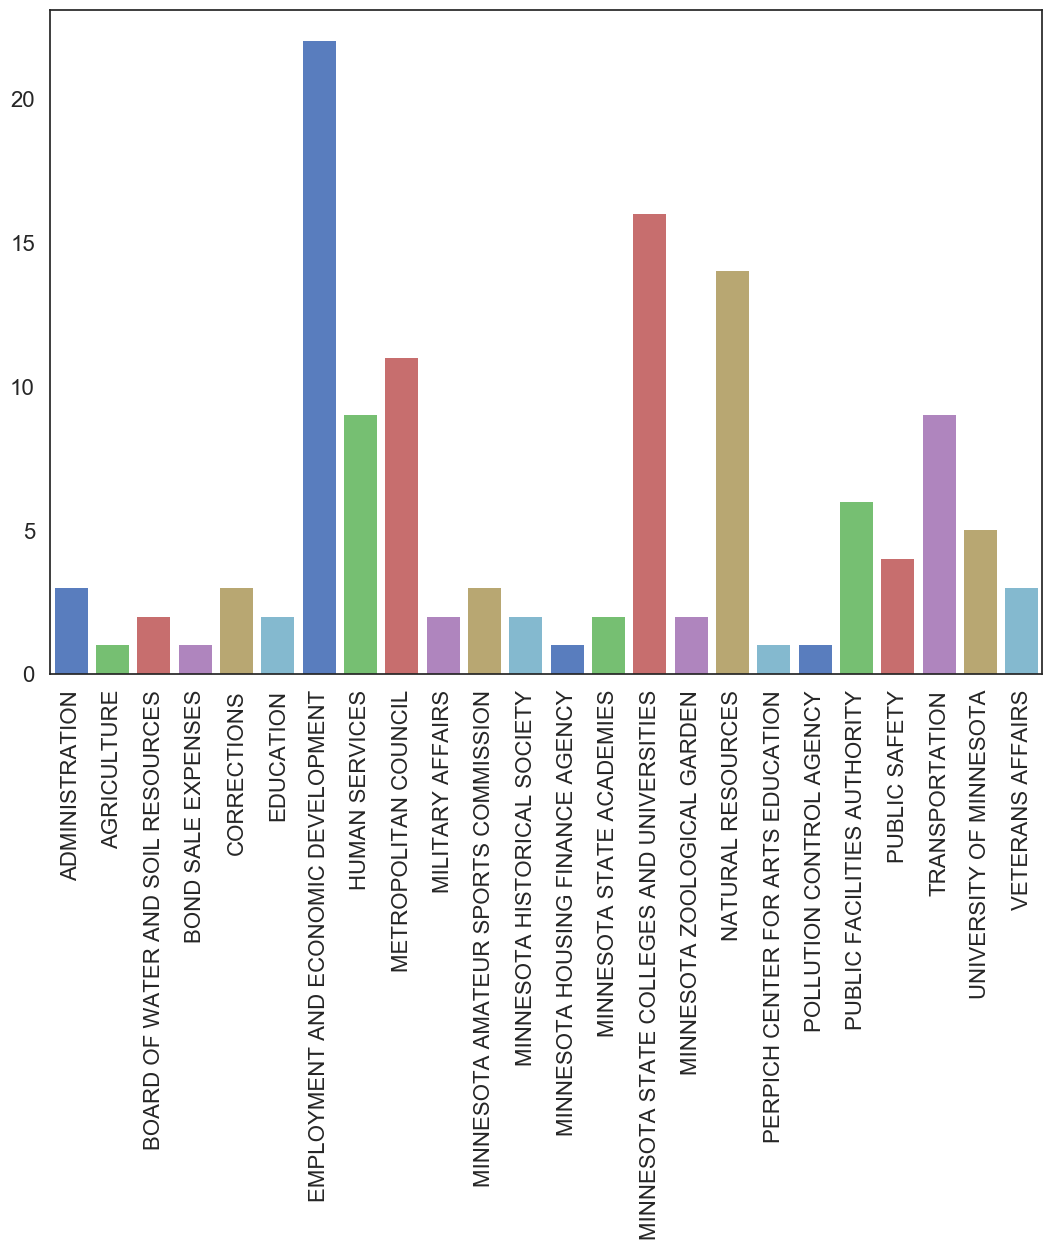

In [6]:
sns.set_context('poster')
bar_plot = sns.barplot(x=sizes.index.values, y=sizes.values, palette="muted", order=sizes.index.values.tolist())
plt.xticks(rotation=90)

## ggplot

In [7]:
from ggplot import *

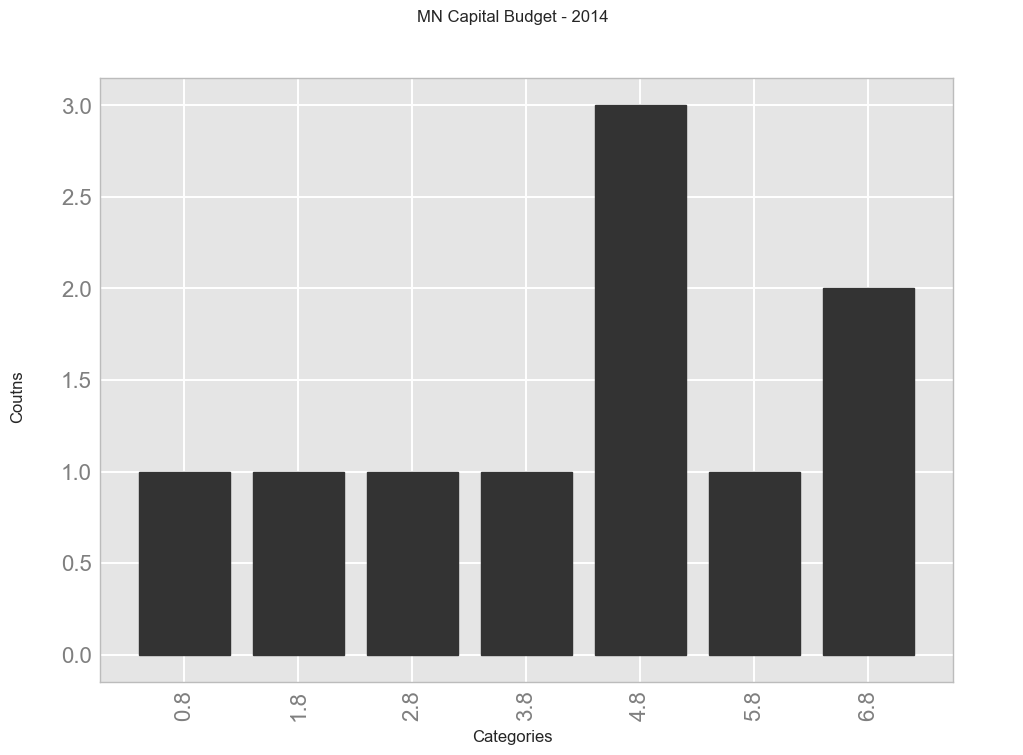

<ggplot: (278785881)>


In [8]:
# dfs = sizes.to_frame(name='count').reset_index()
# dfs['count'] = dfs['count'].astype(float)
# print(dfs.columns)
# print(dfs.index)
# print(dfs.head())
# print(dfs['category'].tolist())
# print(dfs['count'])

dfs = df.sort_values('amount',ascending=False)[:10]

p = ggplot(dfs, aes(x="category",y="amount")) + \
    geom_bar(stat="bar", labels=dfs["category"].tolist()) +\
    ggtitle("MN Capital Budget - 2014") + \
    xlab("Categories") +  \
    ylab("Coutns") + scale_y_continuous(labels='millions') + \
    theme(axis_text_x=element_text(angle=90))
print p

## Bokeh

In [9]:
from bokeh.charts import Bar, show

In [10]:
bar = Bar(sizes, filename="bar.html", title="MN Capital Budget - 2014", legend=False)
show(bar)

## pygal

In [11]:
import pygal
from pygal.style import LightStyle

In [12]:
bar_chart = pygal.Bar(style=LightStyle, width=800, height=600,
                      legend_at_bottom=True, human_readable=True,
                      title='MN Capital Budget - 2014')

In [20]:
for index, row in sizes.iteritems():
    bar_chart.add(index, row)

In [25]:
# bar_chart.render_to_file('budget.svg')
# bar_chart.render_to_png('budget.png')
bar_chart.render_in_browser()

file:///var/folders/5g/krkdym5x1f7fjkqy18dzlhnc0000gp/T/tmphklMzb.html


## Plotly

In [26]:
import plotly.plotly as py
from plotly.graph_objs import *

In [27]:
data = Data([
    Bar(
        x=sizes.index,
        y=sizes.values
    )
])

In [28]:
layout = Layout(
    title='2014 MN Capital Budget',
    font=Font(
        family='Raleway, sans-serif'
    ),
    showlegend=False,
    xaxis=XAxis(
        tickangle=-45
    ),
    bargap=0.05
)

fig = Figure(data=data, layout=layout)
plot_url = py.plot(data,filename='MN Capital Budget - 2014')
py.image.save_as(fig, 'mn-14-budget.png')